In [2]:
import numpy as np
import torch
from torch import nn

In [3]:
class FirstAgentModel(nn.Module):
    active_indices: np.ndarray[int]

    def __init__(self, input_size: int, output_size: int = 6):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size),
        )

    def forward(self, x):
        return self.main(x)


In [4]:
model = FirstAgentModel(372)
model.forward(torch.tensor( np.random.random(372),dtype=torch.float))
torch.save(model.state_dict(),"model.pth")

In [4]:
model2 = FirstAgentModel(372)

In [5]:
model2.load_state_dict(torch.load("model.pth"))
model2.forward(torch.tensor( np.random.random(372),dtype=torch.float))

tensor([-0.1433, -0.0398,  0.1526,  0.0384,  0.1157,  0.0709],
       grad_fn=<ViewBackward0>)

In [16]:
# try out batched behavior
model2.forward(torch.tensor( np.random.random((1,372)),dtype=torch.float))

tensor([[-0.1457, -0.0392,  0.1571,  0.0366,  0.1147,  0.0673]],
       grad_fn=<AddmmBackward0>)

In [9]:
import torch
a=torch.full((10,372),3,dtype=torch.float32)
print(a)
a[1]=torch.full((372,),torch.nan)
c = model.forward(a)
b =  ~torch.isnan(c[:,0]) * 3
b


tensor([[3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.],
        ...,
        [3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.],
        [3., 3., 3.,  ..., 3., 3., 3.]])


tensor([3, 0, 3, 3, 3, 3, 3, 3, 3, 3])

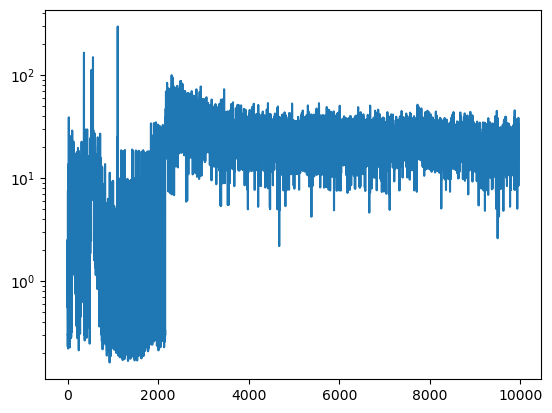

In [4]:
# analyze the loss
import matplotlib.pyplot as plt
import numpy as np
loss = np.load("loss_history_2024-09-06T23:57:23.537110.npy")
plt.figure()
plt.yscale("log")
plt.plot(loss)